# NGSolve Model Templates: 

A python library on top of NGSolve providing state of the art numerical methods for many equations.

## Navier Stokes

hybrid mixed method for Navier-Stokes (Gopalakrishnan+Lederer+Schöberl '20,'20), Dissertation Lederer 2019

In [ ]:
from ngsolve import *
import netgen.geom2d
import netgen.meshing
from ngsolve.webgui import Draw

from ngs_templates.NavierStokes import *
ngsglobals.msg_level = 0

Geometry and mesh:

In [ ]:
geo = netgen.geom2d.SplineGeometry()
geo.AddRectangle( (0, 0), (2, 0.41), bcs = ("wall", "outlet", "wall", "inlet"))
geo.AddCircle ( (0.2, 0.2), r=0.05, leftdomain=0, rightdomain=1, bc="cyl", maxh=0.02)
mesh = Mesh( geo.GenerateMesh(maxh=0.07))
Draw (mesh)
mesh.Curve(3);

In [ ]:
timestep = 0.001
navstokes = NavierStokes (mesh, nu=0.001, order=4, timestep = timestep,
                              inflow="inlet", outflow="outlet", wall="wall|cyl",
                              uin=CoefficientFunction( (1.5*4*y*(0.41-y)/(0.41*0.41), 0) ))
                              

navstokes.SolveInitial()

In [ ]:
scene = Draw (Norm(navstokes.velocity), mesh, "velocity")

tend = 5
t = 0
cnt = 0
with TaskManager():
    while t < tend:
        navstokes.DoTimeStep()
        t = t+timestep
        cnt = cnt+1
        if cnt % 100 == 0:
            print ("t = ", t, "  ", end='\r')
            scene.Redraw()

## The code for the MCS - Navier-Stokes solver

* mixed method with $u_h \in BDM^k \subset H(div)$
* upwind DG for convetive term
* uses SIMPLE time-stepping
* hybrid mixed system for pressure correction

see https://github.com/NGSolve/modeltemplates


Our first flying plane (by Philip Lederer)

<img src="front.png" alt="front" width="700" align="center"/>

<img src="wing-NSt.png" alt="wing-NSt.png" width="700" align="center"/>
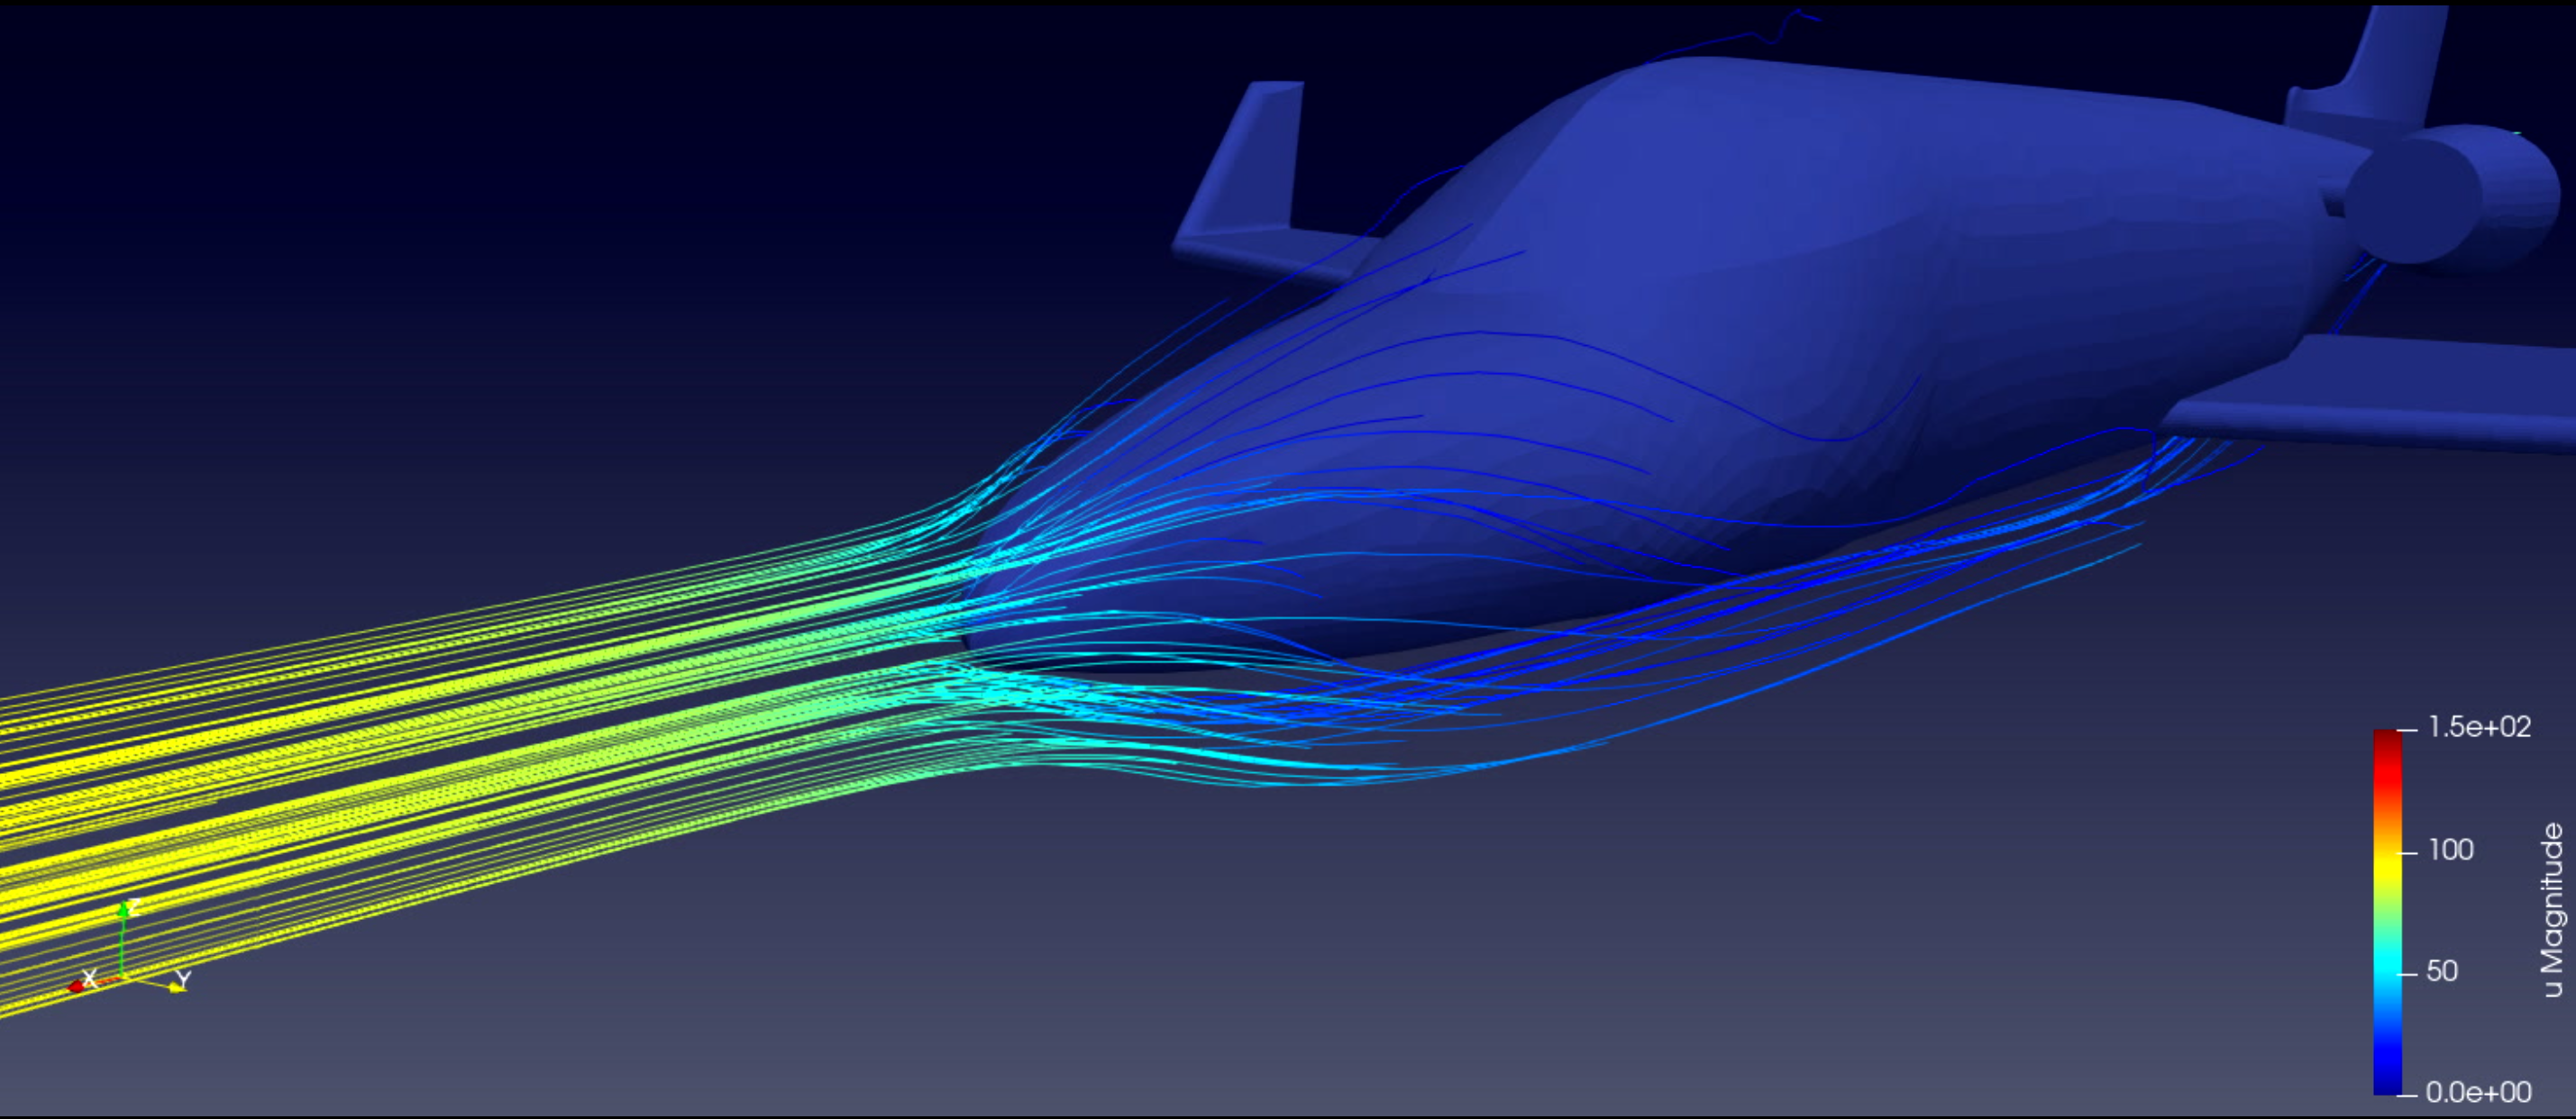

heart model simulation using MCS

<img src="heart.png" alt="front" width="700" align="center"/>

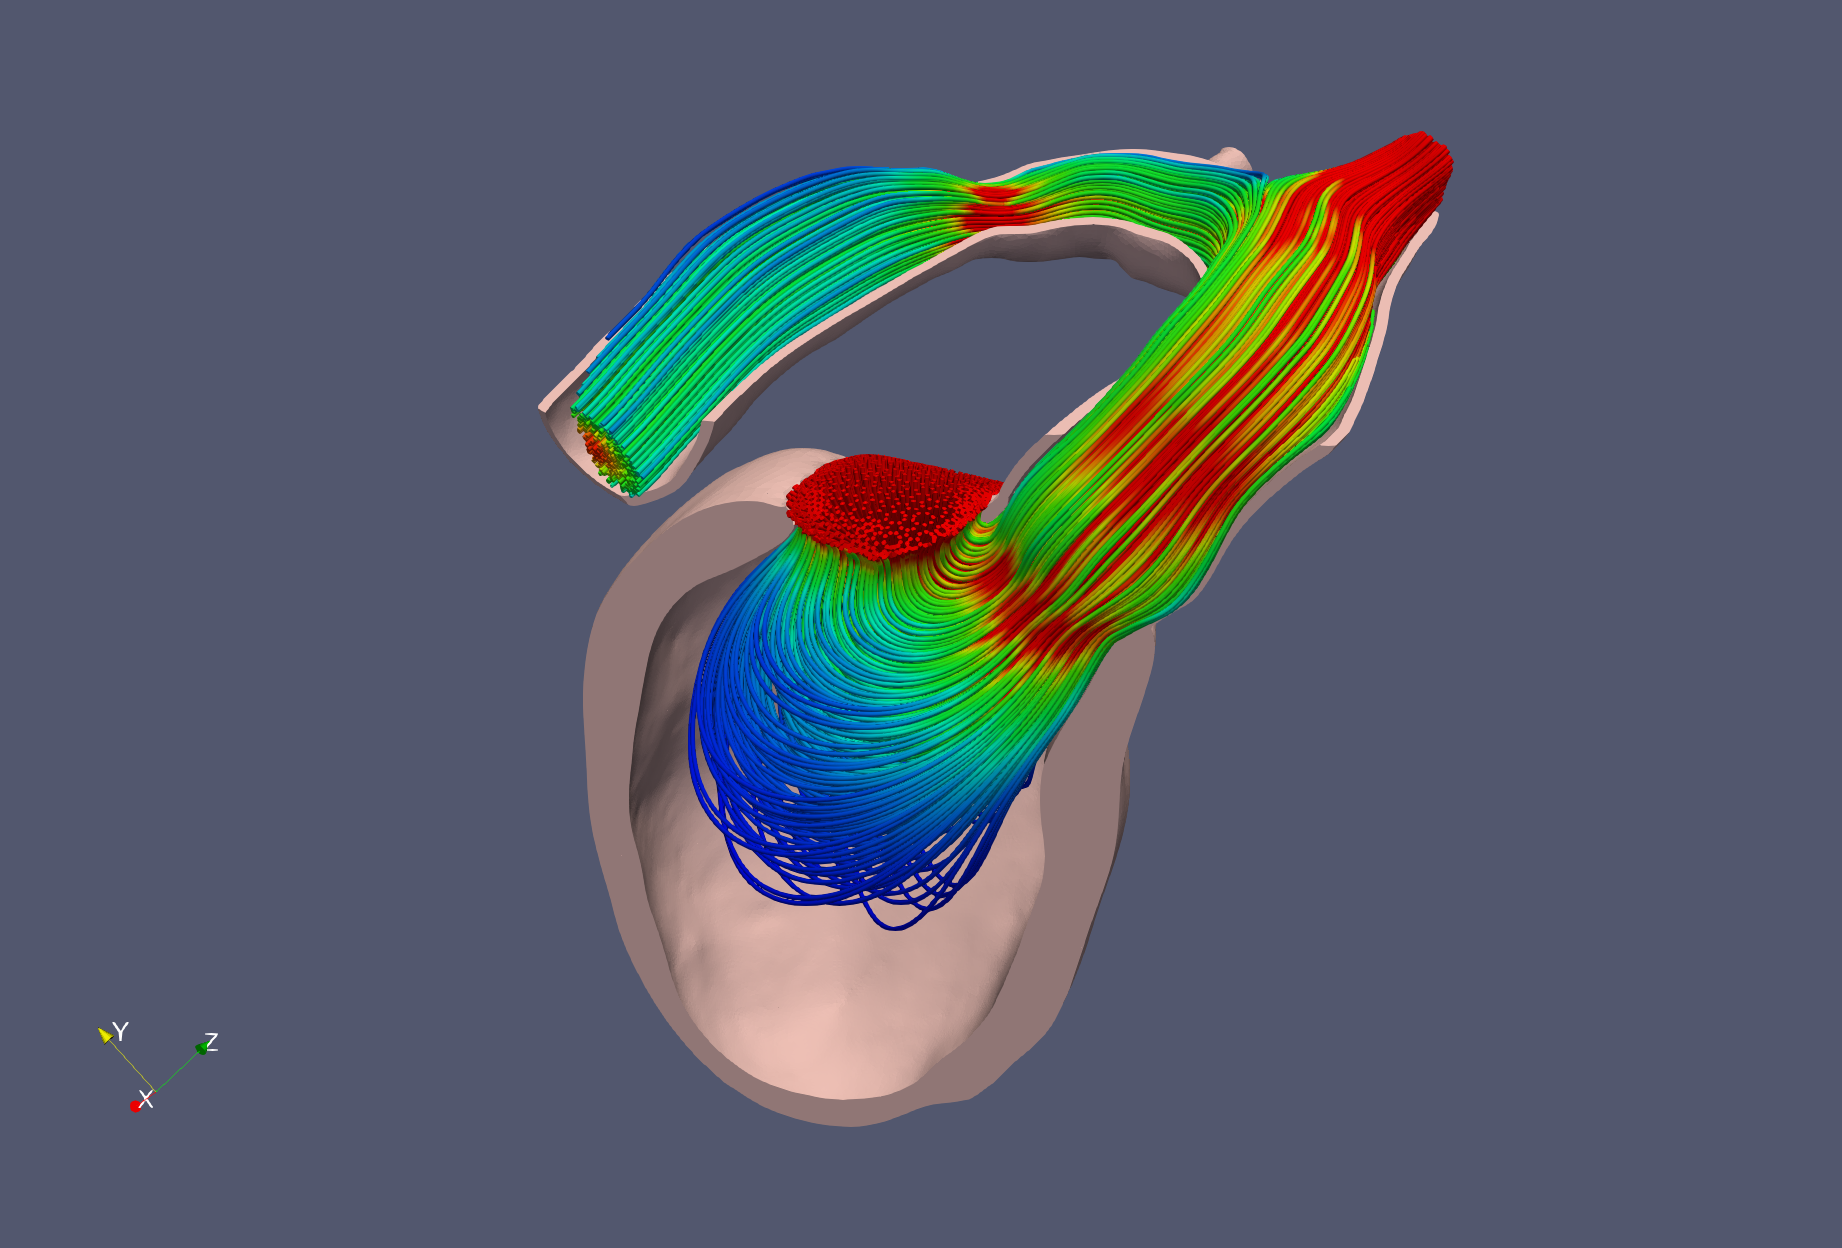